<a href="https://colab.research.google.com/github/Akshat13shah/STT_Ass1/blob/main/STT_CSE_ASS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pydriller

In [ ]:
from pydriller import Repository
import pandas as pd
from tqdm import tqdm
import subprocess
import os

# List of your 3 repos (local clone paths or GitHub URLs)
repositry = {
    "activitywatch": "https://github.com/activitywatch/activitywatch",
    "vidgear": "https://github.com/abhitronix/vidgear",
    "krita-ai-diffusion": "https://github.com/Acly/krita-ai-diffusion"
}

def get_histogram_diff(repo_path, parent, commit):
    """Run git histogram diff and return output as string"""
    try:
        diff = subprocess.check_output(
            ["git", "-C", repo_path, "diff", "--ignore-all-space", "--ignore-blank-lines",
             "--histogram", parent, commit],
            text=True, stderr=subprocess.DEVNULL
        )
        return diff
    except Exception:
        return ""

for repo_name, repo_url in repositry.items():
    print(f"\n Processing repository: {repo_name}")

    data = []  # reset for each repo

    for commit in tqdm(Repository(path_to_repo=repo_url, only_no_merge=True).traverse_commits(),
                       desc=f"Mining {repo_name}", unit="commit"):
        for m in commit.modified_files:
            parent_sha = commit.parents[0] if commit.parents else None

            # Myers diff (strip whitespace + blank lines)
            diff_myers = "\n".join(
                [line.strip() for line in (m.diff or "").splitlines() if line.strip()]
            )

            # Histogram diff with fallback
            diff_hist = ""
            if parent_sha:
                diff_hist = get_histogram_diff(repo_url, parent_sha, commit.hash).strip()
                if not diff_hist and diff_myers:
                    diff_hist = diff_myers

            data.append({
                "old_file_path": m.old_path,
                "new_file_path": m.new_path,
                "commit_sha": commit.hash,
                "parent_commit_sha": parent_sha,
                "commit_message": commit.msg,
                "diff_myers": diff_myers,
                "diff_hist": diff_hist
            })

    # Save one CSV per repo
    df = pd.DataFrame(data)
    out_file = f"{repo_name}_commits.csv"
    df.to_csv(out_file, index=False)
    print(f" Saved {out_file} with {len(df)} rows")



 Processing repository: activitywatch


Mining activitywatch: 947commit [00:13, 68.63commit/s]


 Saved activitywatch_commits.csv with 1846 rows

 Processing repository: vidgear


Mining vidgear: 1039commit [00:29, 34.71commit/s]


 Saved vidgear_commits.csv with 4574 rows

 Processing repository: krita-ai-diffusion


Mining krita-ai-diffusion: 1284commit [00:28, 45.77commit/s]


 Saved krita-ai-diffusion_commits.csv with 4522 rows


In [ ]:
import pandas as pd

# File path
file_path = "/content/activitywatch_commits.csv"

# Remove '/content/' if you just want the filename
file_name = file_path.replace("/content/", "")

# Load into DataFrame
df_activitywatch = pd.read_csv(file_path)

df
print("Shape:", df_activitywatch.shape)


Shape: (1846, 7)


In [ ]:
df_activitywatch

,old_file_path,new_file_path,commit_sha,parent_commit_sha,commit_message,diff_myers,diff_hist
0,NaN,.gitignore,a2f3d9dc35a2efb155c02821b7d59b84eec0d776,NaN,Initial commit,"@@ -0,0 +1,5 @@\n+# Old repo\n+activity-watch\...",NaN
1,NaN,.gitmodules,a2f3d9dc35a2efb155c02821b7d59b84eec0d776,NaN,Initial commit,"@@ -0,0 +1,9 @@\n+[submodule ""actwa-core""]\n+\...",NaN
2,NaN,aw-client,a2f3d9dc35a2efb155c02821b7d59b84eec0d776,NaN,Initial commit,"@@ -0,0 +1 @@\n+Subproject commit cab4e90cc5ff...",NaN
3,NaN,aw-core,a2f3d9dc35a2efb155c02821b7d59b84eec0d776,NaN,Initial commit,"@@ -0,0 +1 @@\n+Subproject commit d4093d7a91c2...",NaN
4,NaN,aw-server,a2f3d9dc35a2efb155c02821b7d59b84eec0d776,NaN,Initial commit,"@@ -0,0 +1 @@\n+Subproject commit 38a82de8947b...",NaN
...,...,...,...,...,...,...,...
1841,aw-server-rust,aw-server-rust,d888e82f016767acd2f3dbf2525dc403d982732c,6c26ebd776512f29b32c5fc81eb796988103ac54,build(deps): updated submodules,@@ -1 +1 @@\n-Subproject commit a0cdef90cf86cd...,@@ -1 +1 @@\n-Subproject commit a0cdef90cf86cd...
1842,aw-watcher-afk,aw-watcher-afk,d888e82f016767acd2f3dbf2525dc403d982732c,6c26ebd776512f29b32c5fc81eb796988103ac54,build(deps): updated submodules,@@ -1 +1 @@\n-Subproject commit 2dd99ca13c8ef9...,@@ -1 +1 @@\n-Subproject commit 2dd99ca13c8ef9...
1843,.github/workflows/build.yml,.github/workflows/build.yml,21d3ff1bcad23c0770dd2ccd4f1fe64f2abb81bc,d888e82f016767acd2f3dbf2525dc403d982732c,ci: switch to ubuntu 22.04 (20.04 EOL),"@@ -26,7 +26,7 @@ jobs:\nstrategy:\nfail-fast:...","@@ -26,7 +26,7 @@ jobs:\nstrategy:\nfail-fast:..."
1844,NaN,gptme.toml,a7608c819b4c7f28338631be0ce526280c331c64,21d3ff1bcad23c0770dd2ccd4f1fe64f2abb81bc,chore: added gptme.toml file,"@@ -0,0 +1,10 @@\n+files = [\n+ ""README.md""...","@@ -0,0 +1,10 @@\n+files = [\n+ ""README.md""..."


In [ ]:
import pandas as pd

# File path
file_path = "/content/krita-ai-diffusion_commits.csv"

# Remove '/content/' if you just want the filename
file_name = file_path.replace("/content/", "")

# Load into DataFrame
df_ai_diffusion = pd.read_csv(file_path)

print("Shape:", df_ai_diffusion.shape)



Shape: (4522, 7)


In [ ]:
df_ai_diffusion

,old_file_path,new_file_path,commit_sha,parent_commit_sha,commit_message,diff_myers,diff_hist
0,NaN,.gitattributes,4da6600f5d0563fffe59e8bb3a476e0b7e6d2662,NaN,Krita plugin for stable diffusion inpaint work...,"@@ -0,0 +1 @@\n+*.png filter=lfs diff=lfs merg...",NaN
1,NaN,.gitignore,4da6600f5d0563fffe59e8bb3a476e0b7e6d2662,NaN,Krita plugin for stable diffusion inpaint work...,"@@ -0,0 +1,6 @@\n+.debug\n+.env\n+.pytest_cach...",NaN
2,NaN,ai_tools.desktop,4da6600f5d0563fffe59e8bb3a476e0b7e6d2662,NaN,Krita plugin for stable diffusion inpaint work...,"@@ -0,0 +1,8 @@\n+[Desktop Entry]\n+Type=Servi...",NaN
3,NaN,ai_tools/__init__.py,4da6600f5d0563fffe59e8bb3a476e0b7e6d2662,NaN,Krita plugin for stable diffusion inpaint work...,"@@ -0,0 +1,9 @@\n+from . import image\n+from ....",NaN
4,NaN,ai_tools/diffusion.py,4da6600f5d0563fffe59e8bb3a476e0b7e6d2662,NaN,Krita plugin for stable diffusion inpaint work...,"@@ -0,0 +1,62 @@\n+import json\n+import urllib...",NaN
...,...,...,...,...,...,...,...
4517,ai_diffusion/language/zh-tw.json,ai_diffusion/language/zh-tw.json,310ccdbcd0d76eabcbf3d0efa5c5fb0ec7789300,a0a691cdb9b0b976f6182d0b653ffdea6bc4b6c8,Update language templates for 1.38.0,"@@ -225,7 +225,6 @@\n""Prompt Line Count"": ""提示詞...","@@ -225,7 +225,6 @@\n""Prompt Line Count"": ""提示詞..."
4518,ai_diffusion/server_requirements.txt,ai_diffusion/server_requirements.txt,310ccdbcd0d76eabcbf3d0efa5c5fb0ec7789300,a0a691cdb9b0b976f6182d0b653ffdea6bc4b6c8,Update language templates for 1.38.0,"@@ -19,8 +19,9 @@ matplotlib==3.10.5\nmediapip...","@@ -19,8 +19,9 @@ matplotlib==3.10.5\nmediapip..."
4519,ai_diffusion/presets/models.json,ai_diffusion/presets/models.json,fafb8c1e9a2e9da622c3385519f679d20a831646,310ccdbcd0d76eabcbf3d0efa5c5fb0ec7789300,Fix wrong folder for Flux Union ControlNet,"@@ -482,7 +482,7 @@\n""name"": ""ControlNet Unive...","@@ -482,7 +482,7 @@\n""name"": ""ControlNet Unive..."
4520,docs/src/content/docs/comfyui-setup.mdx,docs/src/content/docs/comfyui-setup.mdx,fafb8c1e9a2e9da622c3385519f679d20a831646,310ccdbcd0d76eabcbf3d0efa5c5fb0ec7789300,Fix wrong folder for Flux Union ControlNet,"@@ -34,6 +34,7 @@ Models can be downloaded and...","@@ -34,6 +34,7 @@ Models can be downloaded and..."


In [ ]:
import pandas as pd

# File path
file_path = "/content/vidgear_commits.csv"

# Remove '/content/' if you just want the filename
file_name = file_path.replace("/content/", "")

# Load into DataFrame
df_vidgear = pd.read_csv(file_path)

df
print("Shape:", df_vidgear.shape)


Shape: (4574, 7)


In [ ]:
df_vidgear

,old_file_path,new_file_path,commit_sha,parent_commit_sha,commit_message,diff_myers,diff_hist
0,NaN,LICENSE,eca4228859cdc3a5675c2339adc0fbd90d1c5126,NaN,Initial commit,"@@ -0,0 +1,21 @@\n+MIT License\n+\n+Copyright ...",NaN
1,NaN,README.md,6177932cbf997b39bc5e52016553120b00769611,eca4228859cdc3a5675c2339adc0fbd90d1c5126,Initial Release - v0.1.0,"@@ -0,0 +1,65 @@\n+# VidGear\n+\n+VidGear is a...","@@ -0,0 +1,65 @@\n+# VidGear\n+\n+VidGear is a..."
2,NaN,build/lib/vidgear/gears/__init__.py,6177932cbf997b39bc5e52016553120b00769611,eca4228859cdc3a5675c2339adc0fbd90d1c5126,Initial Release - v0.1.0,"@@ -0,0 +1,4 @@\n+# import the necessary packa...","@@ -0,0 +1,4 @@\n+# import the necessary packa..."
3,NaN,build/lib/vidgear/gears/camgear.py,6177932cbf997b39bc5e52016553120b00769611,eca4228859cdc3a5675c2339adc0fbd90d1c5126,Initial Release - v0.1.0,"@@ -0,0 +1,62 @@\n+# import the necessary pack...","@@ -0,0 +1,62 @@\n+# import the necessary pack..."
4,NaN,build/lib/vidgear/gears/pigear.py,6177932cbf997b39bc5e52016553120b00769611,eca4228859cdc3a5675c2339adc0fbd90d1c5126,Initial Release - v0.1.0,"@@ -0,0 +1,96 @@\n+# import the packages\n+fro...","@@ -0,0 +1,96 @@\n+# import the packages\n+fro..."
...,...,...,...,...,...,...,...
4569,docs/gears/writegear/non_compression/usage.md,docs/gears/writegear/non_compression/usage.md,c90183aa5c211e0f7aaf55879bd2892536131165,246d36df5cd931cd2f147d1b8650ab68f2ddade9,👷 CI: Rearranged the dependencies\n\n📝 Docs: F...,"@@ -40,7 +40,7 @@ ## Bare-Minimum Usage\nFollo...","@@ -40,7 +40,7 @@ ## Bare-Minimum Usage\nFollo..."
4570,setup.py,setup.py,0f620e6cbe0da7bff397634c4ee30db542b4dd94,c456574e7dde729a61057ef2db3c4fb77a369099,🚑️ Setup.py: Fixed `simplejpeg` requires `pyth...,"@@ -112,7 +112,7 @@ def latest_version(package...","@@ -112,7 +112,7 @@ def latest_version(package..."
4571,vidgear/gears/helper.py,vidgear/gears/helper.py,7a25a8031a189eb3967be2232e862b56f7981b06,0f620e6cbe0da7bff397634c4ee30db542b4dd94,✨ Helper: Added support for SRTP/RTSPS in `is_...,"@@ -603,8 +603,11 @@ def is_valid_url(path, ur...","@@ -603,8 +603,11 @@ def is_valid_url(path, ur..."
4572,docs/changelog.md,docs/changelog.md,9e80b7c17afafa3958969ee7afb43fcb4d6227d8,7a25a8031a189eb3967be2232e862b56f7981b06,📝 Docs: Updated `changelog.md`.,"@@ -20,9 +20,282 @@\n# Release Notes\n-## v0.3...","@@ -20,9 +20,282 @@\n# Release Notes\n-## v0.3..."


In [ ]:
import pandas as pd
import re

# Load your CSV (original stays as is)
orig_df = pd.read_csv("/content/activitywatch_commits.csv")

# Make a copy for discrepancy analysis
df = orig_df.copy()

# Function to normalize diff text
def normalize(text):
    if pd.isna(text):
        return ""
    text = str(text).strip()
    text = re.sub(r"\s+", " ", text)  # collapse multiple spaces/newlines
    return text

# Compare diffs
df["Discrepancy"] = df.apply(
    lambda row: "Yes" if normalize(row["diff_myers"]) == normalize(row["diff_hist"]) else "No",
    axis=1
)

# Save the *new* file without touching original
df.to_csv("/content/activitywatch_commits_discrepancy.csv", index=False)

# Check how many Yes/No
print(df["Discrepancy"].value_counts())
df.head()




Discrepancy
Yes    1840
No        6
Name: count, dtype: int64


,old_file_path,new_file_path,commit_sha,parent_commit_sha,commit_message,diff_myers,diff_hist,Discrepancy
0,NaN,.gitignore,a2f3d9dc35a2efb155c02821b7d59b84eec0d776,NaN,Initial commit,"@@ -0,0 +1,5 @@\n+# Old repo\n+activity-watch\...",NaN,No
1,NaN,.gitmodules,a2f3d9dc35a2efb155c02821b7d59b84eec0d776,NaN,Initial commit,"@@ -0,0 +1,9 @@\n+[submodule ""actwa-core""]\n+\...",NaN,No
2,NaN,aw-client,a2f3d9dc35a2efb155c02821b7d59b84eec0d776,NaN,Initial commit,"@@ -0,0 +1 @@\n+Subproject commit cab4e90cc5ff...",NaN,No
3,NaN,aw-core,a2f3d9dc35a2efb155c02821b7d59b84eec0d776,NaN,Initial commit,"@@ -0,0 +1 @@\n+Subproject commit d4093d7a91c2...",NaN,No
4,NaN,aw-server,a2f3d9dc35a2efb155c02821b7d59b84eec0d776,NaN,Initial commit,"@@ -0,0 +1 @@\n+Subproject commit 38a82de8947b...",NaN,No


In [ ]:
orig_df = pd.read_csv("/content/krita-ai-diffusion_commits.csv")

# Make a copy for discrepancy analysis
df = orig_df.copy()

# Function to normalize diff text
def normalize(text):
    if pd.isna(text):
        return ""
    text = str(text).strip()
    text = re.sub(r"\s+", " ", text)  # collapse multiple spaces/newlines
    return text

# Compare diffs
df["Discrepancy"] = df.apply(
    lambda row: "Yes" if normalize(row["diff_myers"]) == normalize(row["diff_hist"]) else "No",
    axis=1
)

# Save the *new* file without touching original
df.to_csv("/content/krita-ai-diffusion_discrepancy.csv", index=False)

# Check how many Yes/No
print(df["Discrepancy"].value_counts())
df.head()



Discrepancy
Yes    4508
No       14
Name: count, dtype: int64


,old_file_path,new_file_path,commit_sha,parent_commit_sha,commit_message,diff_myers,diff_hist,Discrepancy
0,NaN,.gitattributes,4da6600f5d0563fffe59e8bb3a476e0b7e6d2662,NaN,Krita plugin for stable diffusion inpaint work...,"@@ -0,0 +1 @@\n+*.png filter=lfs diff=lfs merg...",NaN,No
1,NaN,.gitignore,4da6600f5d0563fffe59e8bb3a476e0b7e6d2662,NaN,Krita plugin for stable diffusion inpaint work...,"@@ -0,0 +1,6 @@\n+.debug\n+.env\n+.pytest_cach...",NaN,No
2,NaN,ai_tools.desktop,4da6600f5d0563fffe59e8bb3a476e0b7e6d2662,NaN,Krita plugin for stable diffusion inpaint work...,"@@ -0,0 +1,8 @@\n+[Desktop Entry]\n+Type=Servi...",NaN,No
3,NaN,ai_tools/__init__.py,4da6600f5d0563fffe59e8bb3a476e0b7e6d2662,NaN,Krita plugin for stable diffusion inpaint work...,"@@ -0,0 +1,9 @@\n+from . import image\n+from ....",NaN,No
4,NaN,ai_tools/diffusion.py,4da6600f5d0563fffe59e8bb3a476e0b7e6d2662,NaN,Krita plugin for stable diffusion inpaint work...,"@@ -0,0 +1,62 @@\n+import json\n+import urllib...",NaN,No


In [ ]:
orig_df = pd.read_csv("/content/vidgear_commits.csv")

# Make a copy for discrepancy analysis
df = orig_df.copy()

# Function to normalize diff text
def normalize(text):
    if pd.isna(text):
        return ""
    text = str(text).strip()
    text = re.sub(r"\s+", " ", text)  # collapse multiple spaces/newlines
    return text

# Compare diffs
df["Discrepancy"] = df.apply(
    lambda row: "Yes" if normalize(row["diff_myers"]) == normalize(row["diff_hist"]) else "No",
    axis=1
)

# Save the *new* file without touching original
df.to_csv("/content/vidgear_discrepancy.csv", index=False)

# Check how many Yes/No
print(df["Discrepancy"].value_counts())
df.head()


Discrepancy
Yes    4573
No        1
Name: count, dtype: int64


,old_file_path,new_file_path,commit_sha,parent_commit_sha,commit_message,diff_myers,diff_hist,Discrepancy
0,NaN,LICENSE,eca4228859cdc3a5675c2339adc0fbd90d1c5126,NaN,Initial commit,"@@ -0,0 +1,21 @@\n+MIT License\n+\n+Copyright ...",NaN,No
1,NaN,README.md,6177932cbf997b39bc5e52016553120b00769611,eca4228859cdc3a5675c2339adc0fbd90d1c5126,Initial Release - v0.1.0,"@@ -0,0 +1,65 @@\n+# VidGear\n+\n+VidGear is a...","@@ -0,0 +1,65 @@\n+# VidGear\n+\n+VidGear is a...",Yes
2,NaN,build/lib/vidgear/gears/__init__.py,6177932cbf997b39bc5e52016553120b00769611,eca4228859cdc3a5675c2339adc0fbd90d1c5126,Initial Release - v0.1.0,"@@ -0,0 +1,4 @@\n+# import the necessary packa...","@@ -0,0 +1,4 @@\n+# import the necessary packa...",Yes
3,NaN,build/lib/vidgear/gears/camgear.py,6177932cbf997b39bc5e52016553120b00769611,eca4228859cdc3a5675c2339adc0fbd90d1c5126,Initial Release - v0.1.0,"@@ -0,0 +1,62 @@\n+# import the necessary pack...","@@ -0,0 +1,62 @@\n+# import the necessary pack...",Yes
4,NaN,build/lib/vidgear/gears/pigear.py,6177932cbf997b39bc5e52016553120b00769611,eca4228859cdc3a5675c2339adc0fbd90d1c5126,Initial Release - v0.1.0,"@@ -0,0 +1,96 @@\n+# import the packages\n+fro...","@@ -0,0 +1,96 @@\n+# import the packages\n+fro...",Yes


📊 Mismatch Statistics:
Category
Other    6
Name: count, dtype: int64


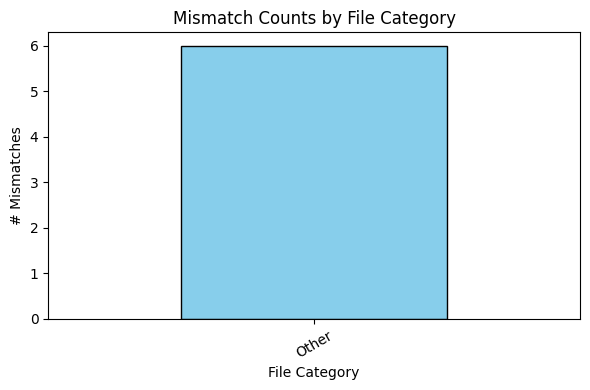

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the discrepancy dataset
df = pd.read_csv("/content/activitywatch_commits_discrepancy.csv")

# Filter only mismatches
mismatches = df[df["Discrepancy"] == "No"].copy()

# Function to categorize files
def categorize_file(path):
    if pd.isna(path):
        return "Other"
    path = str(path).lower()

    if "test" in path:
        return "Test Code"
    elif path.startswith("readme") or "readme" in path:
        return "README"
    elif "license" in path:
        return "LICENSE"
    elif path.endswith((".py", ".java", ".cpp", ".c", ".js", ".ts", ".go", ".rb")):
        return "Source Code"
    else:
        return "Other"

# Apply categorization using new_file_path (if missing, fallback to old_file_path)
mismatches["Category"] = mismatches["new_file_path"].fillna(mismatches["old_file_path"]).apply(categorize_file)

# Count mismatches by category
stats = mismatches["Category"].value_counts()

print("📊 Mismatch Statistics:")
print(stats)

# Plot
plt.figure(figsize=(6,4))
stats.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Mismatch Counts by File Category")
plt.xlabel("File Category")
plt.ylabel("# Mismatches")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


📊 Mismatch Statistics:
Category
Source Code    7
Test Code      4
Other          3
Name: count, dtype: int64


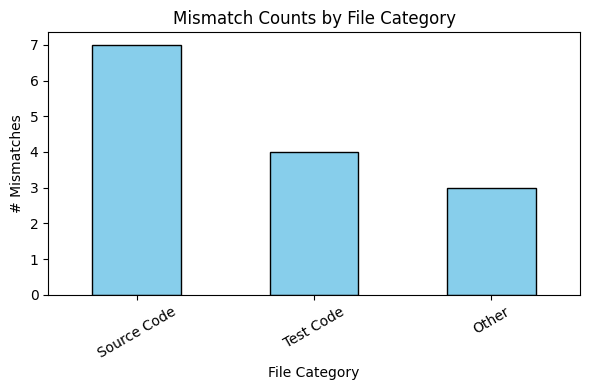

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the discrepancy dataset
df = pd.read_csv("/content/krita-ai-diffusion_discrepancy.csv")

# Filter only mismatches
mismatches = df[df["Discrepancy"] == "No"].copy()

# Function to categorize files
def categorize_file(path):
    if pd.isna(path):
        return "Other"
    path = str(path).lower()

    if "test" in path:
        return "Test Code"
    elif path.startswith("readme") or "readme" in path:
        return "README"
    elif "license" in path:
        return "LICENSE"
    elif path.endswith((".py", ".java", ".cpp", ".c", ".js", ".ts", ".go", ".rb")):
        return "Source Code"
    else:
        return "Other"

# Apply categorization using new_file_path (if missing, fallback to old_file_path)
mismatches["Category"] = mismatches["new_file_path"].fillna(mismatches["old_file_path"]).apply(categorize_file)

# Count mismatches by category
stats = mismatches["Category"].value_counts()

print("📊 Mismatch Statistics:")
print(stats)

# Plot
plt.figure(figsize=(6,4))
stats.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Mismatch Counts by File Category")
plt.xlabel("File Category")
plt.ylabel("# Mismatches")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


📊 Mismatch Statistics:
Category
LICENSE    1
Name: count, dtype: int64


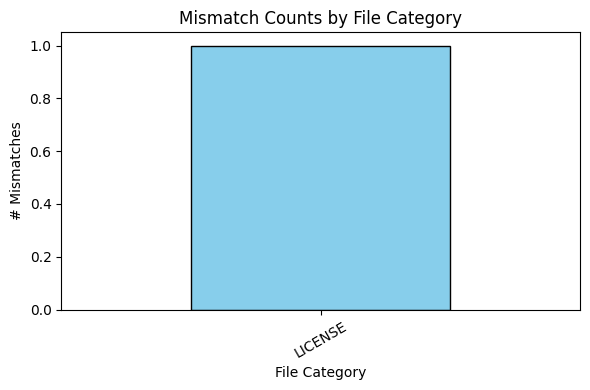

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the discrepancy dataset
df = pd.read_csv("/content/vidgear_discrepancy.csv")

# Filter only mismatches
mismatches = df[df["Discrepancy"] == "No"].copy()

# Function to categorize files
def categorize_file(path):
    if pd.isna(path):
        return "Other"
    path = str(path).lower()

    if "test" in path:
        return "Test Code"
    elif path.startswith("readme") or "readme" in path:
        return "README"
    elif "license" in path:
        return "LICENSE"
    elif path.endswith((".py", ".java", ".cpp", ".c", ".js", ".ts", ".go", ".rb")):
        return "Source Code"
    else:
        return "Other"

# Apply categorization using new_file_path (if missing, fallback to old_file_path)
mismatches["Category"] = mismatches["new_file_path"].fillna(mismatches["old_file_path"]).apply(categorize_file)

# Count mismatches by category
stats = mismatches["Category"].value_counts()

print("📊 Mismatch Statistics:")
print(stats)

# Plot
plt.figure(figsize=(6,4))
stats.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Mismatch Counts by File Category")
plt.xlabel("File Category")
plt.ylabel("# Mismatches")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()